In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Use the correct CSV file path (match the file used elsewhere in this notebook)
data_path = r"C:\Users\USER\Documents\AYENI_243889\HelloWorld\HELLO WORLD\New folder\Chronic_Disease_Project\df.chronic disease.csv"
df = pd.read_csv(data_path, low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\Documents\\OYAGBEMI\\HelloWorld\\HELLO WORLD\\New folder\\Chronic_Disease_Project\\eda_analysis.ipynb\\data\\chronic_disease_data.csv'

In [ ]:
# Identify missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# Create a new version of my data without the missing health stats
df_clean = df.dropna(subset=['DataValue'])

Response                     309215
DataValue                    100019
DataValueAlt                 100019
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
StratificationCategory2      309215
Stratification2              309215
StratificationCategory3      309215
Stratification3              309215
Geolocation                    5763
ResponseID                   309215
StratificationCategoryID2    309215
StratificationID2            309215
StratificationCategoryID3    309215
StratificationID3            309215
dtype: int64


In [ ]:
Stratified_cleaned = df_clean['Stratification1'].fillna('Overall')

In [ ]:
#  Fix for Stratification missing values
df['Stratification1'] = df['Stratification1'].fillna('Overall')
print("Missing values in Stratification1 have been filled with 'Overall'")

Missing values in Stratification1 have been filled with 'Overall'


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [ ]:
df["Topic"].value_counts()

Topic
Cardiovascular Disease                             30709
Chronic Obstructive Pulmonary Disease              26951
Nutrition, Physical Activity, and Weight Status    26069
Health Status                                      25612
Alcohol                                            25321
Cancer                                             22358
Immunization                                       19140
Social Determinants of Health                      19026
Arthritis                                          18645
Diabetes                                           17318
Mental Health                                      16976
Tobacco                                            15931
Oral Health                                        13236
Asthma                                             10511
Cognitive Health and Caregiving                     9904
Sleep                                               5318
Disability                                          5060
Maternal Health          

In [ ]:
# This removes every row where the health data (DataValue) is empty
df = df.dropna(subset=['DataValue'])

In [ ]:
import pandas as pd
import numpy as np

# 1. Force the DataValue column to be numeric
# 'coerce' turns any non-number text (like "No Data") into NaN
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

# 2. Now drop the rows that are genuinely empty
df_clean = df.dropna(subset=['DataValue'])

# 3. Final verification
print(f"Remaining missing values in DataValue: {df_clean['DataValue'].isnull().sum()}")
print(f"Total rows ready for analysis: {len(df_clean)}")

Remaining missing values in DataValue: 0
Total rows ready for analysis: 209196


In [ ]:
# Group by disease topic and calculate the average percentage
ranking = df_clean.groupby('Topic')['DataValue'].mean().sort_values(ascending=False)

# Display the top 10
print("Top 10 Most Prevalent Conditions:")
print(ranking.head(10))

Top 10 Most Prevalent Conditions:
Topic
Chronic Obstructive Pulmonary Disease    3084.580554
Chronic Kidney Disease                   2702.197115
Cardiovascular Disease                   1860.673527
Cancer                                   1858.512419
Diabetes                                  826.880313
Maternal Health                            87.924917
Alcohol                                    84.916572
Oral Health                                52.536645
Sleep                                      46.791040
Immunization                               44.907401
Name: DataValue, dtype: float64


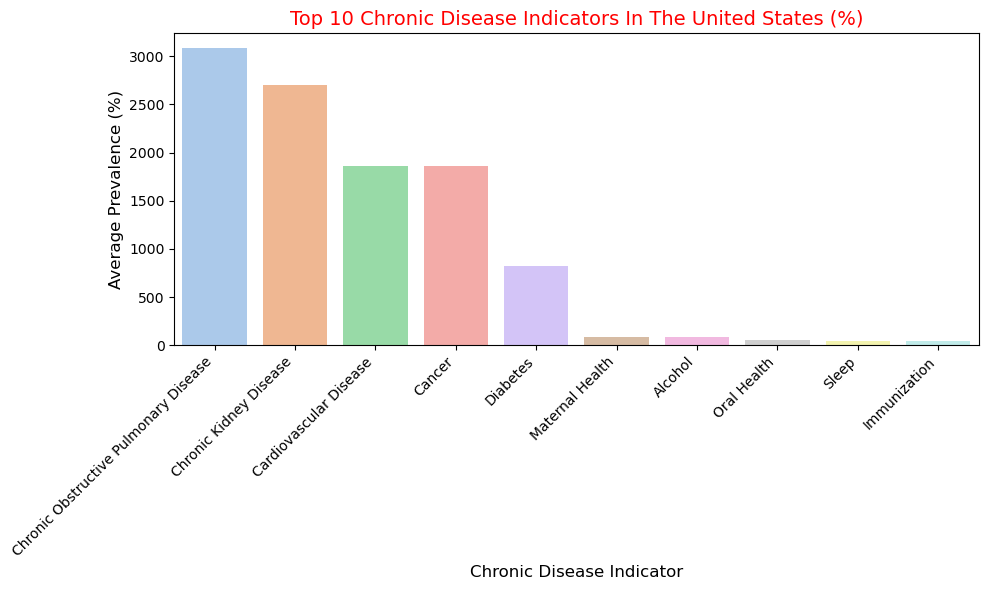

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Prepare the data for plotting - get the top 10 conditions
prevalence_ranking = df.groupby('Topic')['DataValue'].mean().sort_values(ascending=False).head(10)

# 2. Create the vertical  bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=prevalence_ranking.index,
    y=prevalence_ranking.values,
    palette="pastel",
    hue=prevalence_ranking.index,
    legend=False
)

# 3. Add titles and labels for clarity
plt.title('Top 10 Chronic Disease Indicators In The United States (%)', fontsize=14 , color='red')
plt.ylabel('Average Prevalence (%)', fontsize=12)
plt.xlabel('Chronic Disease Indicator', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 4. Clean up the spacing so long labels fit perfectly
plt.tight_layout()

# 5. Show the plot
plt.show()

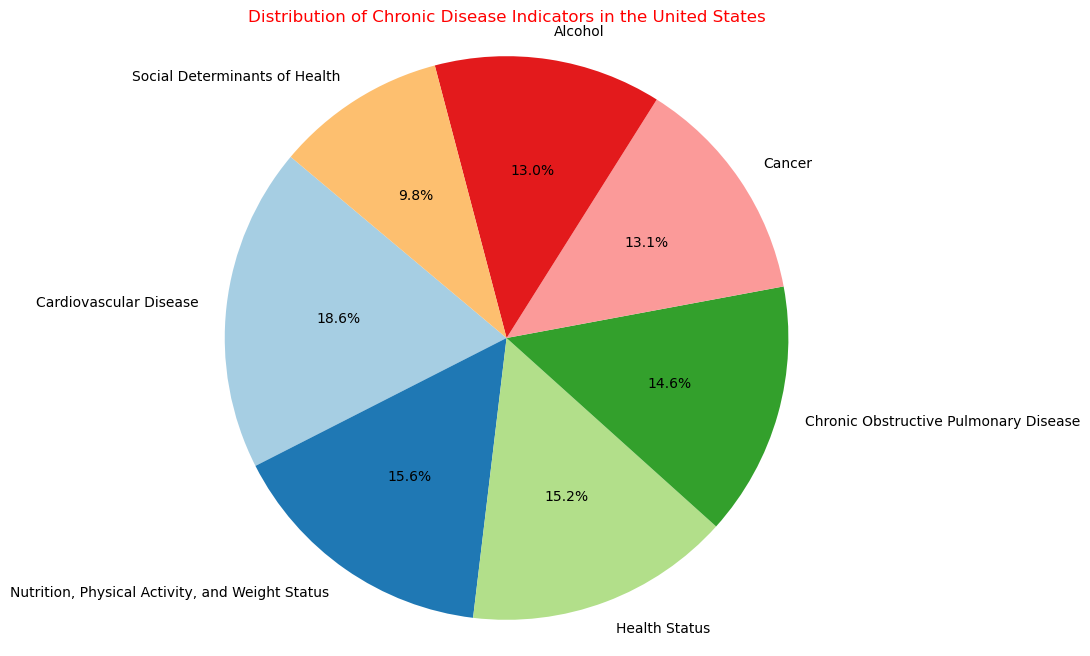

In [ ]:
#Only plot the top Chronic Disease Indicators In The United States
df['Topic'].value_counts().head(7).plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Chronic Disease Indicators in the United States', fontsize=12, color='red')
plt.ylabel('')  # Hide y-label for better aesthetics
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


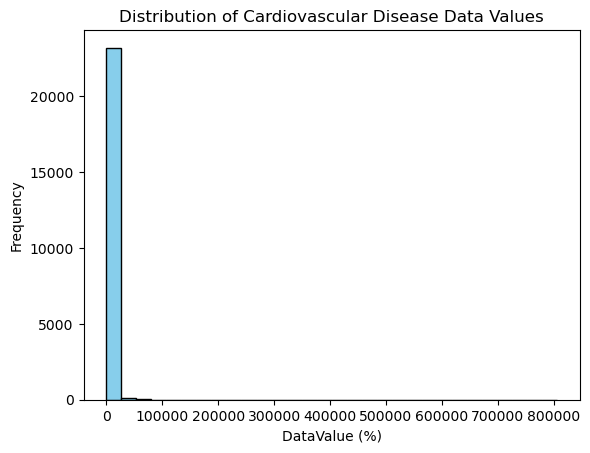

In [ ]:
df[df['Topic'] == 'Cardiovascular Disease']['DataValue'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cardiovascular Disease Data Values')
plt.xlabel('DataValue (%)')
plt.ylabel('Frequency')
plt.show()

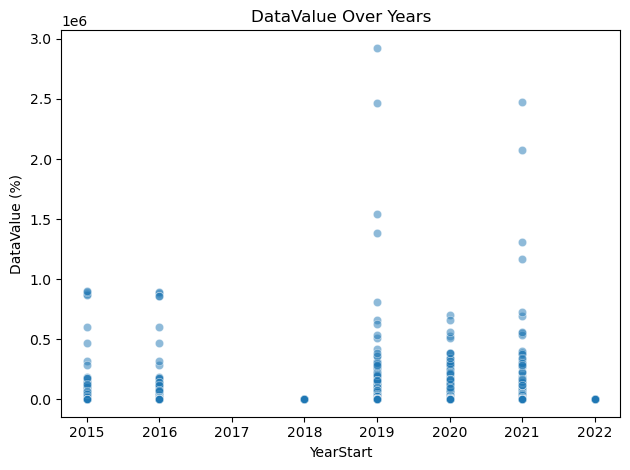

In [ ]:
sns.scatterplot(x=df['YearStart'], y=df['DataValue'], alpha=0.5)
plt.title('DataValue Over Years')
plt.xlabel('YearStart')
plt.ylabel('DataValue (%)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the data
file_path = r'C:\Users\USER\Documents\AYENI_243889\HelloWorld\HELLO WORLD\New folder\Chronic_Disease_Project\df.chronic disease.csv'
df = pd.read_csv(file_path)

# 1. Drop 100% empty columns
cols_to_drop = [
    'Response', 'StratificationCategory2', 'Stratification2', 
    'StratificationCategory3', 'Stratification3'
]
df_clean = df.drop(columns=cols_to_drop)

# 2. Convert DataValue to numeric and drop rows where it is missing
df_clean['DataValue'] = pd.to_numeric(df_clean['DataValue'], errors='coerce')
df_clean = df_clean.dropna(subset=['DataValue'])

print(f"Dataset cleaned. Remaining rows: {len(df_clean)}")

Dataset cleaned. Remaining rows: 209196


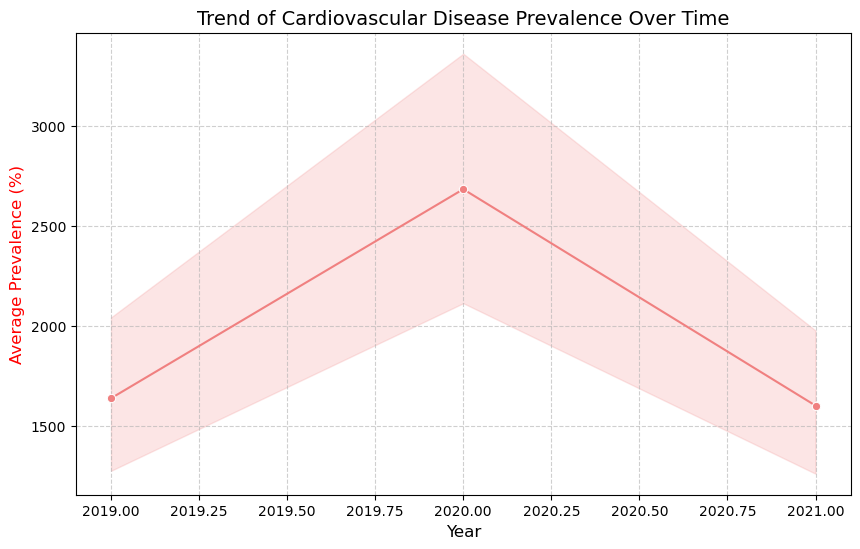

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for a specific topic (e.g., Cardiovascular Disease)
trend_df = df_clean[df_clean['Topic'] == 'Cardiovascular Disease']

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='YearStart', y='DataValue', marker='o', color='lightcoral')

plt.title('Trend of Cardiovascular Disease Prevalence Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Prevalence (%)', fontsize=12, color='red')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

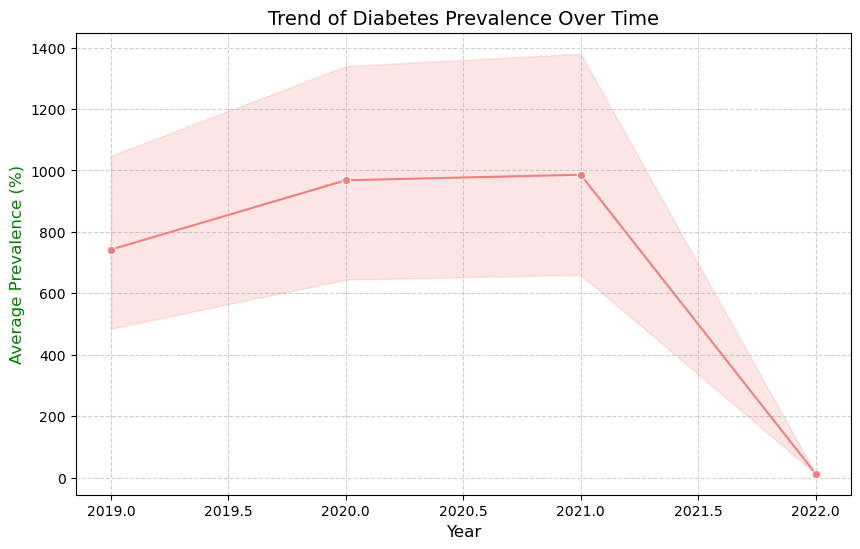

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for a specific topic (e.g., Diabetes)
trend_df = df_clean[df_clean['Topic'] == 'Diabetes']

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='YearStart', y='DataValue', marker='o', color='lightcoral')

plt.title('Trend of Diabetes Prevalence Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Prevalence (%)', fontsize=12, color='green')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

ValueError: 'light coral' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

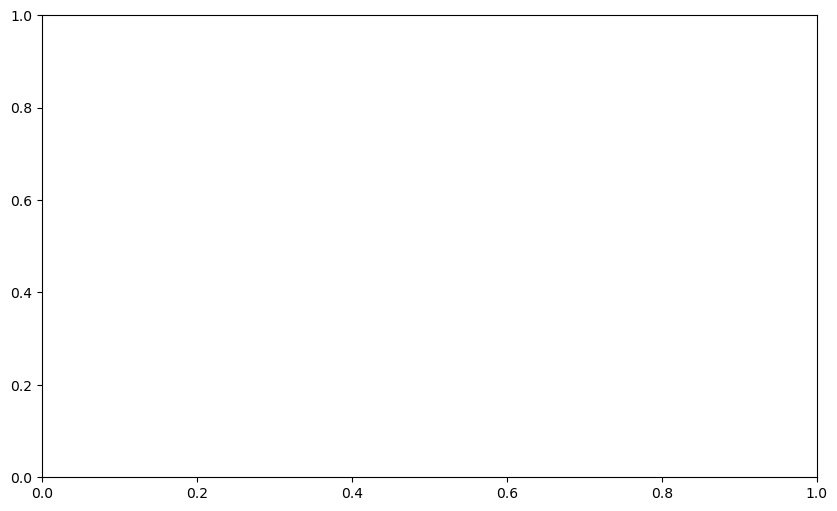

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for a specific topic (e.g., Chronic Kidney Disease)
trend_df = df_clean[df_clean['Topic'] == 'Chronic Kidney Disease']

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='YearStart', y='DataValue', marker='o', color='light coral')

plt.title('Trend of Chronic Kidney Disease Prevalence Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Prevalence (%)', fontsize=12, color='lightcoral')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()